In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.metrics import classification_report,confusion_matrix
import numpy as np

In [2]:
df=pd.read_csv("customers.csv")
df.head()

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,462809,Male,No,22,No,Healthcare,1.0,Low,4.0,Cat_4,D
1,462643,Female,Yes,38,Yes,Engineer,NaN,Average,3.0,Cat_4,A
2,466315,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,Cat_6,B
3,461735,Male,Yes,67,Yes,Lawyer,0.0,High,2.0,Cat_6,B
4,462669,Female,Yes,40,Yes,Entertainment,NaN,High,6.0,Cat_6,A


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10695 entries, 0 to 10694
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               10695 non-null  int64  
 1   Gender           10695 non-null  object 
 2   Ever_Married     10505 non-null  object 
 3   Age              10695 non-null  int64  
 4   Graduated        10593 non-null  object 
 5   Profession       10533 non-null  object 
 6   Work_Experience  9597 non-null   float64
 7   Spending_Score   10695 non-null  object 
 8   Family_Size      10247 non-null  float64
 9   Var_1            10587 non-null  object 
 10  Segmentation     10695 non-null  object 
dtypes: float64(2), int64(2), object(7)
memory usage: 919.2+ KB


In [4]:
df.isnull().sum()

ID                    0
Gender                0
Ever_Married        190
Age                   0
Graduated           102
Profession          162
Work_Experience    1098
Spending_Score        0
Family_Size         448
Var_1               108
Segmentation          0
dtype: int64

In [5]:
df=df.drop('ID',axis=1)
df=df.drop('Var_1',axis=1)

In [6]:
df=df.dropna(axis=0)

In [7]:
for i in ['Gender','Ever_Married','Graduated','Profession','Spending_Score','Segmentation']:
    print(i,":",list(df[i].unique()))

Gender : ['Male', 'Female']
Ever_Married : ['No', 'Yes']
Graduated : ['No', 'Yes']
Profession : ['Healthcare', 'Engineer', 'Lawyer', 'Artist', 'Doctor', 'Homemaker', 'Entertainment', 'Marketing', 'Executive']
Spending_Score : ['Low', 'High', 'Average']
Segmentation : ['D', 'B', 'C', 'A']


In [8]:
Clist=[['Male', 'Female'],['No', 'Yes'],['No', 'Yes'],
           ['Healthcare', 'Engineer', 'Lawyer', 'Artist', 'Doctor',
            'Homemaker', 'Entertainment', 'Marketing', 'Executive'],
           ['Low', 'Average', 'High']]
enc = OrdinalEncoder(categories=Clist)

In [9]:
df[['Gender','Ever_Married','Graduated','Profession',
        'Spending_Score']] = enc.fit_transform(df[['Gender','Ever_Married',
                                                   'Graduated','Profession',
                                                    'Spending_Score']])

In [10]:
le = LabelEncoder()
df['Segmentation'] = le.fit_transform(df['Segmentation'])

In [11]:
scaler=MinMaxScaler()
df[['Age']]=scaler.fit_transform(df[['Age']])

In [12]:
X=df.iloc[:,:-1]
Y=df[['Segmentation']]

In [13]:
X

,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size
0,0.0,0.0,0.056338,0.0,0.0,1.0,0.0,4.0
2,1.0,1.0,0.690141,1.0,1.0,1.0,0.0,1.0
3,0.0,1.0,0.690141,1.0,2.0,0.0,2.0,2.0
5,0.0,1.0,0.535211,0.0,3.0,0.0,1.0,2.0
6,0.0,0.0,0.197183,1.0,0.0,1.0,0.0,3.0
...,...,...,...,...,...,...,...,...
10689,1.0,0.0,0.239437,1.0,6.0,1.0,0.0,2.0
10690,0.0,0.0,0.154930,0.0,0.0,9.0,0.0,4.0
10691,1.0,0.0,0.239437,1.0,4.0,1.0,0.0,1.0
10693,0.0,1.0,0.408451,1.0,8.0,1.0,2.0,5.0


In [14]:
ohe=OneHotEncoder()
Y=ohe.fit_transform(Y).toarray()

In [15]:
xtrain,xtest,ytrain,ytest=train_test_split(X,Y,test_size=0.33,random_state=42)

In [16]:
model=Sequential([Dense(6,activation='relu',input_shape=[8]),
                  Dense(10,activation='relu'),
                  Dense(10,activation='relu'),
                  Dense(4,activation='softmax')])

C:\Users\SEC\anaconda3\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [17]:
model.compile(optimizer='adam',loss='categorical_crossentropy' ,metrics=['accuracy'])

In [18]:
model.fit(xtrain,ytrain,epochs=2000,batch_size=32,validation_data=(xtest,ytest))

Epoch 1/2000
187/187 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.2614 - loss: 1.4199 - val_accuracy: 0.3338 - val_loss: 1.3746
Epoch 2/2000
187/187 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.3409 - loss: 1.3706 - val_accuracy: 0.3815 - val_loss: 1.2976
Epoch 3/2000
187/187 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.4014 - loss: 1.2848 - val_accuracy: 0.3948 - val_loss: 1.2731
Epoch 4/2000
187/187 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.4318 - loss: 1.2418 - val_accuracy: 0.4033 - val_loss: 1.2653
Epoch 5/2000
187/187 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.4363 - loss: 1.2415 - val_accuracy: 0.4087 - val_loss: 1.2612
Epoch 6/2000
187/187 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.4421 - loss: 1.2319 - val_accuracy: 0.4166 - val_loss: 1.2597
Epoch 7/2000
187/187 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.4432 - loss: 1.2448 - val_accuracy: 0.4319 - val_loss: 1.2499
Epoch 8/2000
187/187 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.4479 - loss: 1.2270 - 

187/187 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.4951 - loss: 1.1583 - val_accuracy: 0.4639 - val_loss: 1.1948
Epoch 100/2000
187/187 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.4861 - loss: 1.1747 - val_accuracy: 0.4680 - val_loss: 1.1939
Epoch 101/2000
187/187 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.4698 - loss: 1.1903 - val_accuracy: 0.4693 - val_loss: 1.1956
Epoch 102/2000
187/187 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.4817 - loss: 1.1844 - val_accuracy: 0.4700 - val_loss: 1.1994
Epoch 103/2000
187/187 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.4872 - loss: 1.1709 - val_accuracy: 0.4605 - val_loss: 1.1944
Epoch 104/2000
187/187 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.4875 - loss: 1.1717 - val_accuracy: 0.4663 - val_loss: 1.1912
Epoch 105/2000
187/187 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.4797 - loss: 1.1787 - val_accuracy: 0.4629 - val_loss: 1.1936
Epoch 106/2000
187/187 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.4904 - loss: 1.1632 -

187/187 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.4788 - loss: 1.1726 - val_accuracy: 0.4687 - val_loss: 1.1914
Epoch 198/2000
187/187 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.4993 - loss: 1.1537 - val_accuracy: 0.4653 - val_loss: 1.1914
Epoch 199/2000
187/187 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.4909 - loss: 1.1705 - val_accuracy: 0.4670 - val_loss: 1.1915
Epoch 200/2000
187/187 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.4977 - loss: 1.1613 - val_accuracy: 0.4656 - val_loss: 1.1910
Epoch 201/2000
187/187 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.4926 - loss: 1.1676 - val_accuracy: 0.4639 - val_loss: 1.1915
Epoch 202/2000
187/187 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.4914 - loss: 1.1691 - val_accuracy: 0.4670 - val_loss: 1.1920
Epoch 203/2000
187/187 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.4908 - loss: 1.1658 - val_accuracy: 0.4581 - val_loss: 1.1928
Epoch 204/2000
187/187 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.4839 - loss: 1.1725 -

187/187 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.4854 - loss: 1.1578 - val_accuracy: 0.4588 - val_loss: 1.1900
Epoch 296/2000
187/187 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.4898 - loss: 1.1534 - val_accuracy: 0.4639 - val_loss: 1.1888
Epoch 297/2000
187/187 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.4884 - loss: 1.1551 - val_accuracy: 0.4584 - val_loss: 1.1941
Epoch 298/2000
187/187 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.4914 - loss: 1.1700 - val_accuracy: 0.4629 - val_loss: 1.1932
Epoch 299/2000
187/187 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.4820 - loss: 1.1731 - val_accuracy: 0.4564 - val_loss: 1.1956
Epoch 300/2000
187/187 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.4860 - loss: 1.1665 - val_accuracy: 0.4622 - val_loss: 1.1927
Epoch 301/2000
187/187 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.4843 - loss: 1.1655 - val_accuracy: 0.4642 - val_loss: 1.1915
Epoch 302/2000
187/187 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.4956 - loss: 1.1502 -

187/187 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.4970 - loss: 1.1550 - val_accuracy: 0.4646 - val_loss: 1.1896
Epoch 394/2000
187/187 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.4937 - loss: 1.1566 - val_accuracy: 0.4567 - val_loss: 1.1896
Epoch 395/2000
187/187 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.4879 - loss: 1.1654 - val_accuracy: 0.4653 - val_loss: 1.1895
Epoch 396/2000
187/187 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5107 - loss: 1.1451 - val_accuracy: 0.4659 - val_loss: 1.1874
Epoch 397/2000
187/187 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.4932 - loss: 1.1593 - val_accuracy: 0.4704 - val_loss: 1.1891
Epoch 398/2000
187/187 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.4824 - loss: 1.1629 - val_accuracy: 0.4605 - val_loss: 1.1915
Epoch 399/2000
187/187 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.4841 - loss: 1.1611 - val_accuracy: 0.4670 - val_loss: 1.1888
Epoch 400/2000
187/187 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.4779 - loss: 1.1668 -

187/187 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.4971 - loss: 1.1520 - val_accuracy: 0.4578 - val_loss: 1.1967
Epoch 492/2000
187/187 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.4911 - loss: 1.1666 - val_accuracy: 0.4649 - val_loss: 1.1882
Epoch 493/2000
187/187 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.4955 - loss: 1.1490 - val_accuracy: 0.4612 - val_loss: 1.1984
Epoch 494/2000
187/187 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.4934 - loss: 1.1474 - val_accuracy: 0.4680 - val_loss: 1.1886
Epoch 495/2000
187/187 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.4878 - loss: 1.1629 - val_accuracy: 0.4615 - val_loss: 1.1931
Epoch 496/2000
187/187 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.4946 - loss: 1.1548 - val_accuracy: 0.4612 - val_loss: 1.1925
Epoch 497/2000
187/187 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.4889 - loss: 1.1576 - val_accuracy: 0.4598 - val_loss: 1.1918
Epoch 498/2000
187/187 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.4918 - loss: 1.1541 -

187/187 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.4964 - loss: 1.1607 - val_accuracy: 0.4646 - val_loss: 1.1921
Epoch 590/2000
187/187 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.4938 - loss: 1.1518 - val_accuracy: 0.4574 - val_loss: 1.1962
Epoch 591/2000
187/187 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.4890 - loss: 1.1578 - val_accuracy: 0.4632 - val_loss: 1.1929
Epoch 592/2000
187/187 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.4930 - loss: 1.1604 - val_accuracy: 0.4642 - val_loss: 1.1894
Epoch 593/2000
187/187 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.4938 - loss: 1.1578 - val_accuracy: 0.4636 - val_loss: 1.1967
Epoch 594/2000
187/187 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.4743 - loss: 1.1834 - val_accuracy: 0.4649 - val_loss: 1.1957
Epoch 595/2000
187/187 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.4905 - loss: 1.1606 - val_accuracy: 0.4632 - val_loss: 1.1939
Epoch 596/2000
187/187 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.4997 - loss: 1.1487 -

187/187 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.4921 - loss: 1.1564 - val_accuracy: 0.4646 - val_loss: 1.1926
Epoch 688/2000
187/187 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.4960 - loss: 1.1517 - val_accuracy: 0.4673 - val_loss: 1.1917
Epoch 689/2000
187/187 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.4856 - loss: 1.1556 - val_accuracy: 0.4588 - val_loss: 1.1959
Epoch 690/2000
187/187 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.4917 - loss: 1.1595 - val_accuracy: 0.4619 - val_loss: 1.1897
Epoch 691/2000
187/187 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.5057 - loss: 1.1362 - val_accuracy: 0.4673 - val_loss: 1.1933
Epoch 692/2000
187/187 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.4943 - loss: 1.1552 - val_accuracy: 0.4581 - val_loss: 1.1956
Epoch 693/2000
187/187 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.4856 - loss: 1.1635 - val_accuracy: 0.4625 - val_loss: 1.1920
Epoch 694/2000
187/187 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.4808 - loss: 1.1688 -

187/187 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.4928 - loss: 1.1702 - val_accuracy: 0.4564 - val_loss: 1.1971
Epoch 786/2000
187/187 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.4875 - loss: 1.1587 - val_accuracy: 0.4673 - val_loss: 1.1984
Epoch 787/2000
187/187 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.4839 - loss: 1.1702 - val_accuracy: 0.4649 - val_loss: 1.1907
Epoch 788/2000
187/187 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.4970 - loss: 1.1520 - val_accuracy: 0.4615 - val_loss: 1.1940
Epoch 789/2000
187/187 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5013 - loss: 1.1556 - val_accuracy: 0.4656 - val_loss: 1.1911
Epoch 790/2000
187/187 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.4870 - loss: 1.1732 - val_accuracy: 0.4540 - val_loss: 1.1991
Epoch 791/2000
187/187 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.4999 - loss: 1.1429 - val_accuracy: 0.4680 - val_loss: 1.1924
Epoch 792/2000
187/187 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.4999 - loss: 1.1504 -

187/187 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.4882 - loss: 1.1553 - val_accuracy: 0.4741 - val_loss: 1.1932
Epoch 884/2000
187/187 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5056 - loss: 1.1492 - val_accuracy: 0.4680 - val_loss: 1.1944
Epoch 885/2000
187/187 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.4882 - loss: 1.1673 - val_accuracy: 0.4571 - val_loss: 1.1965
Epoch 886/2000
187/187 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.4908 - loss: 1.1656 - val_accuracy: 0.4629 - val_loss: 1.1990
Epoch 887/2000
187/187 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.4855 - loss: 1.1636 - val_accuracy: 0.4721 - val_loss: 1.1930
Epoch 888/2000
187/187 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.4794 - loss: 1.1668 - val_accuracy: 0.4564 - val_loss: 1.1922
Epoch 889/2000
187/187 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.4903 - loss: 1.1621 - val_accuracy: 0.4683 - val_loss: 1.1927
Epoch 890/2000
187/187 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.4921 - loss: 1.1550 -

187/187 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.4877 - loss: 1.1627 - val_accuracy: 0.4564 - val_loss: 1.1955
Epoch 982/2000
187/187 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.4889 - loss: 1.1743 - val_accuracy: 0.4632 - val_loss: 1.1938
Epoch 983/2000
187/187 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5002 - loss: 1.1522 - val_accuracy: 0.4615 - val_loss: 1.1949
Epoch 984/2000
187/187 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.4956 - loss: 1.1493 - val_accuracy: 0.4687 - val_loss: 1.1942
Epoch 985/2000
187/187 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.4984 - loss: 1.1471 - val_accuracy: 0.4676 - val_loss: 1.1913
Epoch 986/2000
187/187 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.4923 - loss: 1.1503 - val_accuracy: 0.4680 - val_loss: 1.1908
Epoch 987/2000
187/187 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.4868 - loss: 1.1574 - val_accuracy: 0.4636 - val_loss: 1.1949
Epoch 988/2000
187/187 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.4889 - loss: 1.1513 -

187/187 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.4991 - loss: 1.1534 - val_accuracy: 0.4639 - val_loss: 1.1940
Epoch 1080/2000
187/187 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.4913 - loss: 1.1554 - val_accuracy: 0.4642 - val_loss: 1.1937
Epoch 1081/2000
187/187 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.4903 - loss: 1.1480 - val_accuracy: 0.4612 - val_loss: 1.1932
Epoch 1082/2000
187/187 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.4938 - loss: 1.1601 - val_accuracy: 0.4642 - val_loss: 1.1921
Epoch 1083/2000
187/187 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.4938 - loss: 1.1545 - val_accuracy: 0.4649 - val_loss: 1.1918
Epoch 1084/2000
187/187 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.4944 - loss: 1.1591 - val_accuracy: 0.4544 - val_loss: 1.2020
Epoch 1085/2000
187/187 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.4846 - loss: 1.1604 - val_accuracy: 0.4591 - val_loss: 1.1938
Epoch 1086/2000
187/187 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.4920 - loss: 1

187/187 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.4948 - loss: 1.1633 - val_accuracy: 0.4666 - val_loss: 1.1983
Epoch 1178/2000
187/187 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.4914 - loss: 1.1515 - val_accuracy: 0.4598 - val_loss: 1.1956
Epoch 1179/2000
187/187 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.4949 - loss: 1.1581 - val_accuracy: 0.4642 - val_loss: 1.1947
Epoch 1180/2000
187/187 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.4997 - loss: 1.1462 - val_accuracy: 0.4612 - val_loss: 1.1919
Epoch 1181/2000
187/187 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.4870 - loss: 1.1559 - val_accuracy: 0.4605 - val_loss: 1.1975
Epoch 1182/2000
187/187 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.4932 - loss: 1.1599 - val_accuracy: 0.4622 - val_loss: 1.1948
Epoch 1183/2000
187/187 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.4821 - loss: 1.1596 - val_accuracy: 0.4656 - val_loss: 1.1981
Epoch 1184/2000
187/187 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.4925 - loss: 1

187/187 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.4996 - loss: 1.1442 - val_accuracy: 0.4591 - val_loss: 1.1999
Epoch 1276/2000
187/187 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.4815 - loss: 1.1591 - val_accuracy: 0.4632 - val_loss: 1.1939
Epoch 1277/2000
187/187 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.4940 - loss: 1.1626 - val_accuracy: 0.4663 - val_loss: 1.1947
Epoch 1278/2000
187/187 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.4884 - loss: 1.1528 - val_accuracy: 0.4666 - val_loss: 1.1930
Epoch 1279/2000
187/187 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.4912 - loss: 1.1536 - val_accuracy: 0.4656 - val_loss: 1.1984
Epoch 1280/2000
187/187 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.4856 - loss: 1.1646 - val_accuracy: 0.4625 - val_loss: 1.2016
Epoch 1281/2000
187/187 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.4882 - loss: 1.1601 - val_accuracy: 0.4615 - val_loss: 1.1928
Epoch 1282/2000
187/187 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.4973 - loss: 1

187/187 ━━━━━━━━━━━━━━━━━━━━ 4s 17ms/step - accuracy: 0.5080 - loss: 1.1462 - val_accuracy: 0.4646 - val_loss: 1.1943
Epoch 1374/2000
187/187 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - accuracy: 0.4896 - loss: 1.1486 - val_accuracy: 0.4639 - val_loss: 1.1936
Epoch 1375/2000
187/187 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - accuracy: 0.5020 - loss: 1.1427 - val_accuracy: 0.4656 - val_loss: 1.1966
Epoch 1376/2000
187/187 ━━━━━━━━━━━━━━━━━━━━ 4s 20ms/step - accuracy: 0.5006 - loss: 1.1547 - val_accuracy: 0.4615 - val_loss: 1.1956
Epoch 1377/2000
187/187 ━━━━━━━━━━━━━━━━━━━━ 5s 13ms/step - accuracy: 0.4844 - loss: 1.1619 - val_accuracy: 0.4595 - val_loss: 1.1940
Epoch 1378/2000
187/187 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - accuracy: 0.4869 - loss: 1.1566 - val_accuracy: 0.4659 - val_loss: 1.1952
Epoch 1379/2000
187/187 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - accuracy: 0.4908 - loss: 1.1607 - val_accuracy: 0.4690 - val_loss: 1.1943
Epoch 1380/2000
187/187 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.4792 -

Epoch 1422/2000
187/187 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.4964 - loss: 1.1581 - val_accuracy: 0.4649 - val_loss: 1.1952
Epoch 1423/2000
187/187 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.4856 - loss: 1.1591 - val_accuracy: 0.4646 - val_loss: 1.1942
Epoch 1424/2000
187/187 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5034 - loss: 1.1420 - val_accuracy: 0.4601 - val_loss: 1.1998
Epoch 1425/2000
187/187 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.4912 - loss: 1.1525 - val_accuracy: 0.4646 - val_loss: 1.2021
Epoch 1426/2000
187/187 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.4883 - loss: 1.1517 - val_accuracy: 0.4591 - val_loss: 1.1961
Epoch 1427/2000
187/187 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5074 - loss: 1.1500 - val_accuracy: 0.4646 - val_loss: 1.1933
Epoch 1428/2000
187/187 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.4880 - loss: 1.1560 - val_accuracy: 0.4666 - val_loss: 1.1951
Epoch 1429/2000
187/187 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 

187/187 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.5006 - loss: 1.1398 - val_accuracy: 0.4663 - val_loss: 1.1926
Epoch 1472/2000
187/187 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.4804 - loss: 1.1695 - val_accuracy: 0.4639 - val_loss: 1.2018
Epoch 1473/2000
187/187 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.4998 - loss: 1.1427 - val_accuracy: 0.4683 - val_loss: 1.1921
Epoch 1474/2000
187/187 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.4902 - loss: 1.1545 - val_accuracy: 0.4564 - val_loss: 1.1976
Epoch 1475/2000
187/187 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.4941 - loss: 1.1579 - val_accuracy: 0.4605 - val_loss: 1.1957
Epoch 1476/2000
187/187 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.4969 - loss: 1.1457 - val_accuracy: 0.4636 - val_loss: 1.1987
Epoch 1477/2000
187/187 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.4869 - loss: 1.1553 - val_accuracy: 0.4608 - val_loss: 1.1942
Epoch 1478/2000
187/187 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.4871 - loss: 1

187/187 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.4886 - loss: 1.1637 - val_accuracy: 0.4642 - val_loss: 1.1982
Epoch 1570/2000
187/187 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.4960 - loss: 1.1545 - val_accuracy: 0.4625 - val_loss: 1.1966
Epoch 1571/2000
187/187 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step - accuracy: 0.5040 - loss: 1.1437 - val_accuracy: 0.4656 - val_loss: 1.1937
Epoch 1572/2000
187/187 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - accuracy: 0.4903 - loss: 1.1633 - val_accuracy: 0.4649 - val_loss: 1.1957
Epoch 1573/2000
187/187 ━━━━━━━━━━━━━━━━━━━━ 6s 17ms/step - accuracy: 0.4887 - loss: 1.1634 - val_accuracy: 0.4601 - val_loss: 1.1969
Epoch 1574/2000
187/187 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - accuracy: 0.4836 - loss: 1.1621 - val_accuracy: 0.4649 - val_loss: 1.1942
Epoch 1575/2000
187/187 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step - accuracy: 0.4947 - loss: 1.1544 - val_accuracy: 0.4629 - val_loss: 1.1958
Epoch 1576/2000
187/187 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - accuracy: 0.4899 -

Epoch 1618/2000
187/187 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - accuracy: 0.4947 - loss: 1.1601 - val_accuracy: 0.4612 - val_loss: 1.1955
Epoch 1619/2000
187/187 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - accuracy: 0.4880 - loss: 1.1586 - val_accuracy: 0.4697 - val_loss: 1.1959
Epoch 1620/2000
187/187 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.4874 - loss: 1.1623 - val_accuracy: 0.4584 - val_loss: 1.1942
Epoch 1621/2000
187/187 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - accuracy: 0.4965 - loss: 1.1466 - val_accuracy: 0.4710 - val_loss: 1.1920
Epoch 1622/2000
187/187 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.4995 - loss: 1.1418 - val_accuracy: 0.4704 - val_loss: 1.1931
Epoch 1623/2000
187/187 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.4866 - loss: 1.1643 - val_accuracy: 0.4622 - val_loss: 1.1966
Epoch 1624/2000
187/187 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.4917 - loss: 1.1493 - val_accuracy: 0.4646 - val_loss: 1.1942
Epoch 1625/2000
187/187 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accura

187/187 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5058 - loss: 1.1433 - val_accuracy: 0.4670 - val_loss: 1.1952
Epoch 1668/2000
187/187 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.4953 - loss: 1.1643 - val_accuracy: 0.4656 - val_loss: 1.1957
Epoch 1669/2000
187/187 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.4882 - loss: 1.1599 - val_accuracy: 0.4653 - val_loss: 1.1949
Epoch 1670/2000
187/187 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.4952 - loss: 1.1479 - val_accuracy: 0.4653 - val_loss: 1.1931
Epoch 1671/2000
187/187 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.5038 - loss: 1.1467 - val_accuracy: 0.4636 - val_loss: 1.1940
Epoch 1672/2000
187/187 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.4953 - loss: 1.1596 - val_accuracy: 0.4615 - val_loss: 1.1960
Epoch 1673/2000
187/187 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.5007 - loss: 1.1478 - val_accuracy: 0.4612 - val_loss: 1.1996
Epoch 1674/2000
187/187 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.4986 - loss: 1

187/187 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.4969 - loss: 1.1530 - val_accuracy: 0.4659 - val_loss: 1.1979
Epoch 1766/2000
187/187 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.4886 - loss: 1.1493 - val_accuracy: 0.4619 - val_loss: 1.1946
Epoch 1767/2000
187/187 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.4864 - loss: 1.1574 - val_accuracy: 0.4636 - val_loss: 1.1966
Epoch 1768/2000
187/187 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.5106 - loss: 1.1313 - val_accuracy: 0.4649 - val_loss: 1.1953
Epoch 1769/2000
187/187 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5009 - loss: 1.1411 - val_accuracy: 0.4629 - val_loss: 1.2021
Epoch 1770/2000
187/187 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.5088 - loss: 1.1460 - val_accuracy: 0.4663 - val_loss: 1.1956
Epoch 1771/2000
187/187 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.4851 - loss: 1.1659 - val_accuracy: 0.4612 - val_loss: 1.2006
Epoch 1772/2000
187/187 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.4906 - loss: 1

187/187 ━━━━━━━━━━━━━━━━━━━━ 5s 17ms/step - accuracy: 0.5129 - loss: 1.1323 - val_accuracy: 0.4581 - val_loss: 1.1955
Epoch 1864/2000
187/187 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - accuracy: 0.4972 - loss: 1.1442 - val_accuracy: 0.4622 - val_loss: 1.2010
Epoch 1865/2000
187/187 ━━━━━━━━━━━━━━━━━━━━ 5s 13ms/step - accuracy: 0.4959 - loss: 1.1574 - val_accuracy: 0.4646 - val_loss: 1.1984
Epoch 1866/2000
187/187 ━━━━━━━━━━━━━━━━━━━━ 4s 16ms/step - accuracy: 0.5149 - loss: 1.1362 - val_accuracy: 0.4646 - val_loss: 1.1958
Epoch 1867/2000
187/187 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - accuracy: 0.4947 - loss: 1.1514 - val_accuracy: 0.4676 - val_loss: 1.1944
Epoch 1868/2000
187/187 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - accuracy: 0.4873 - loss: 1.1576 - val_accuracy: 0.4636 - val_loss: 1.1986
Epoch 1869/2000
187/187 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - accuracy: 0.4951 - loss: 1.1427 - val_accuracy: 0.4581 - val_loss: 1.1957
Epoch 1870/2000
187/187 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.4880 -

Epoch 1912/2000
187/187 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - accuracy: 0.4908 - loss: 1.1523 - val_accuracy: 0.4666 - val_loss: 1.1975
Epoch 1913/2000
187/187 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - accuracy: 0.4963 - loss: 1.1529 - val_accuracy: 0.4629 - val_loss: 1.1971
Epoch 1914/2000
187/187 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - accuracy: 0.4996 - loss: 1.1461 - val_accuracy: 0.4608 - val_loss: 1.1948
Epoch 1915/2000
187/187 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step - accuracy: 0.4960 - loss: 1.1531 - val_accuracy: 0.4663 - val_loss: 1.2010
Epoch 1916/2000
187/187 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - accuracy: 0.5014 - loss: 1.1410 - val_accuracy: 0.4598 - val_loss: 1.1986
Epoch 1917/2000
187/187 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - accuracy: 0.4980 - loss: 1.1431 - val_accuracy: 0.4584 - val_loss: 1.1963
Epoch 1918/2000
187/187 ━━━━━━━━━━━━━━━━━━━━ 6s 14ms/step - accuracy: 0.4943 - loss: 1.1509 - val_accuracy: 0.4683 - val_loss: 1.1963
Epoch 1919/2000
187/187 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - ac

Epoch 1961/2000
187/187 ━━━━━━━━━━━━━━━━━━━━ 4s 17ms/step - accuracy: 0.4941 - loss: 1.1565 - val_accuracy: 0.4601 - val_loss: 1.1990
Epoch 1962/2000
187/187 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step - accuracy: 0.5062 - loss: 1.1393 - val_accuracy: 0.4571 - val_loss: 1.1971
Epoch 1963/2000
187/187 ━━━━━━━━━━━━━━━━━━━━ 6s 14ms/step - accuracy: 0.5042 - loss: 1.1358 - val_accuracy: 0.4673 - val_loss: 1.1952
Epoch 1964/2000
187/187 ━━━━━━━━━━━━━━━━━━━━ 6s 14ms/step - accuracy: 0.5043 - loss: 1.1343 - val_accuracy: 0.4544 - val_loss: 1.1987
Epoch 1965/2000
187/187 ━━━━━━━━━━━━━━━━━━━━ 6s 16ms/step - accuracy: 0.4921 - loss: 1.1528 - val_accuracy: 0.4636 - val_loss: 1.1952
Epoch 1966/2000
187/187 ━━━━━━━━━━━━━━━━━━━━ 5s 13ms/step - accuracy: 0.5079 - loss: 1.1451 - val_accuracy: 0.4615 - val_loss: 1.2026
Epoch 1967/2000
187/187 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - accuracy: 0.4869 - loss: 1.1619 - val_accuracy: 0.4608 - val_loss: 1.1997
Epoch 1968/2000
187/187 ━━━━━━━━━━━━━━━━━━━━ 4s 16ms/step - ac

<AxesSubplot:>

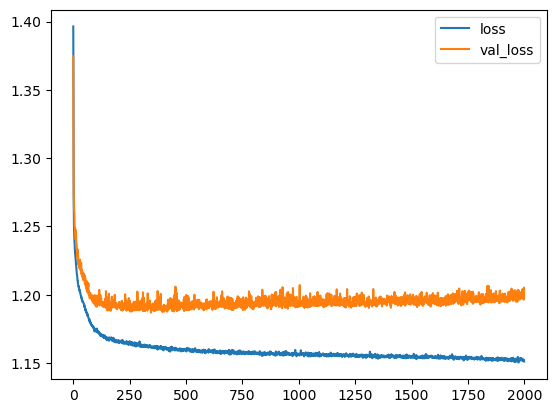

In [19]:
metrics = pd.DataFrame(model.history.history)
metrics[['loss','val_loss']].plot()

In [22]:
ypred = np.argmax(model.predict(xtest), axis=1)
ytrue = np.argmax(ytest,axis=1)

92/92 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step


In [26]:
print(confusion_matrix(ytrue,ypred))
print(classification_report(ytrue,ypred))

[[280 126 142 251]
 [191 175 207 114]
 [ 90  99 352 114]
 [132  43  66 554]]
              precision    recall  f1-score   support

           0       0.40      0.35      0.38       799
           1       0.40      0.25      0.31       687
           2       0.46      0.54      0.50       655
           3       0.54      0.70      0.61       795

    accuracy                           0.46      2936
   macro avg       0.45      0.46      0.45      2936
weighted avg       0.45      0.46      0.45      2936



In [35]:
x_single_prediction = np.argmax(model.predict(X[3:4]), axis=1)
print(x_single_prediction)
print(le.inverse_transform(x_single_prediction))

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
[2]
['C']


In [34]:
X[3:4]

,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size
5,0.0,1.0,0.535211,0.0,3.0,0.0,1.0,2.0


In [33]:
Y[3:4]

array([[0., 0., 1., 0.]])